# **Univariate Homework**

In [3]:
import pandas as pd
df = pd.read_csv('https://www.dropbox.com/scl/fi/0zneuew9yvgysa51ztsxi/WorldBankDataReName.csv?rlkey=le45ehajl1jqrrf3zgqb12hxc&dl=1')

df.head()

,CountryName,CountryCode,IndicatorName,Year,Value
0,Afghanistan,AFG,Access to electricity (% of population),2000,NaN
1,Albania,ALB,Access to electricity (% of population),2000,100.0
2,Algeria,DZA,Access to electricity (% of population),2000,NaN
3,American Samoa,ASM,Access to electricity (% of population),2000,NaN
4,Andorra,AND,Access to electricity (% of population),2000,100.0


# **Problem 1: Number of Records**

**Q1. How many records (or rows) are in the World Bank Data file?**

Give me the number

In [7]:
df.shape[0]

308140

# **Problem 2: Unique Countries**

**Q2. How many unique country names are in the file?**

Give me the number

In [41]:
df["CountryName"].nunique()

217

# **Problem 3: Zimbabwe's Urban Population Percent**



**Q3. What was Zimbabwe's urban population percent in 2006?**

Give me the value as a float

In [73]:
mask = df[  (df["CountryName"] == "Zimbabwe")   & (df["Year"] == 2006) & (df["IndicatorName"] == "Urban population (% of total population)")] 
mask["Value"]

107197    33.926
Name: Value, dtype: float64

# **Problem 4-5: Electricity**

Return the 5 countries have the lowest access to electricity (% of population) in 2019?

**Q4. What country had the *lowest* access to electricity based on % of the population?** Give me the country as a string

**Q5. What was the value returned for the country with the *5th* lowest access to electricity based on % of population?** Give me the value as a float.

In [122]:
lowElectric = df[(df["IndicatorName"] == "Access to electricity (% of population)") & (df["Year"] == 2019)].sort_values(by="Value").head()
lowElectric
print(lowElectric.iloc[0]["CountryName"])
lowElectric.iloc[4]["Value"]

South Sudan


14.3

# **Problem 6-7: Malaria**

Return the top 5 countries with the highest average malaria rate (per 1,000 population at risk) across all the years in the dataset?

**Q6. What country had the *highest* average malaria rate (per 1,000 population) across all the years in the dataset?**

**Q7. What was the value returned for the country with the *4th* highest average malaria rate (per 1,000 population) across all the years in the dataset?**

In [219]:
topMalaria = df[df["IndicatorName"] == "Incidence of malaria (per 1,000 population at risk)"].groupby(by="CountryName")["Value"].mean().sort_values(ascending=False)
print(topMalaria.head(1))
topMalaria.iloc[3]

CountryName
Burkina Faso    479.691354
Name: Value, dtype: float64


404.23881054

# **Problem 8-9: Malaria - 2018**

Calculate the average (mean) number of people (per 1,000 population at risk) that have had an incident with malaria across all countries in 2018. Also calculate the skewness of the same demographic.

**Q8. What is the average (mean) number of people (per 1,000 population at risk) that have had an incident with malaria across all countries in 2018?**

**Q9. Which of the following statements is true? Refer to the LS exam for the statements. The statements are about interpreting the skewness.**


In [50]:
from scipy import stats

print(df[(df["IndicatorName"] == "Incidence of malaria (per 1,000 population at risk)") & (df["Year"] == 2018)]["Value"].mean())
df[(df["IndicatorName"] == "Incidence of malaria (per 1,000 population at risk)") & (df["Year"] == 2018)]["Value"].skew()

41.52505020528572


2.4966986217664036

# **Problem 10-12: HistPlot - Women in Parliament**

Display an image that shows both a histogram for the percentage of women holding national parliament seats among all the countries in 2000 in one color and a histogram for the percentage of women holidng national parliament seats among all the countries in 2019 on the same image in another color.

Include a title.

**Q10 and Q11. Calculate and present however you wish, the mean percentage of women holidng national parliament seats in 2000 and for 2019.***

**Hint:** It may be helpful to first filter the df dataframe to only include rows that include the Indicator Name "Proportion of seats held by women in national parliaments (%)" from either 2019 or 2000 and save that filtered dataframe to a new dataframe (such as womenParliamentDF). Find the means and create the histagrams off the new dataframe.



**Q12. Use the histogram to identify which of the following statements is false. Refer to the LS exam for the statements.**

20.14300130747466
8.520236774617512


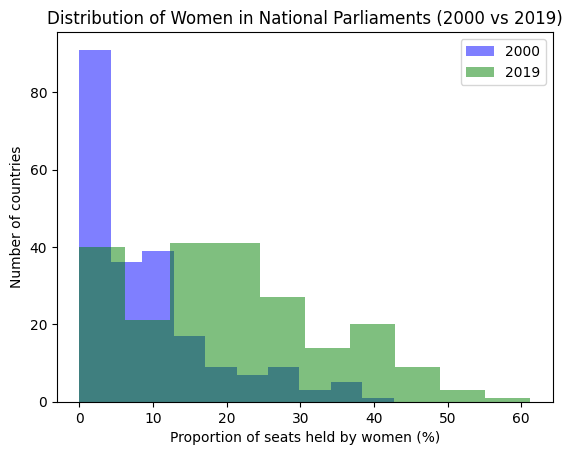

In [147]:
import matplotlib.pyplot as plt
import numpy


womenPaliamentDF = df[(df["IndicatorName"] == "Proportion of seats held by women in national parliaments (%)")]
wpdf2019 = womenPaliamentDF[womenPaliamentDF["Year"] == 2019]["Value"]
print(wpdf2019.mean())
wpdf2000 = womenPaliamentDF[womenPaliamentDF["Year"] == 2000]["Value"]
print(wpdf2000.mean())

# plt.hist(x= womenPaliamentDF)
plt.hist(wpdf2000, alpha=0.5, label='2000', color='blue')
plt.hist(wpdf2019, alpha=0.5, label='2019', color='green')
plt.xlabel('Proportion of seats held by women (%)')
plt.ylabel('Number of countries')
plt.title('Distribution of Women in National Parliaments (2000 vs 2019)')
plt.legend()
plt.show()


# **Problem 13: Pivot Table - Internet**

**Q13. Create a single pivot table that shows the min, mean, median, max, and skewness of all individuals using the internet (% of population) for the years 2000 and 2019. The pivot table will return 2 rows: 2000 and 2019.**

The concept of having multiple values in the pivot table's aggfunc is new and purposefully wasn't discussed in class. In industry, you'll be asked to create things you haven't been specifically taught before. Learning how to google and create things based off online documents is a key skill to learn. I recommend using this [doc](https://datagy.io/python-pivot-tables/) or this [doc](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot_table.html). You will answer questions in LS about your results.


In [170]:
pivotData= df[(df["IndicatorName"] == "Individuals using the Internet (% of population)") & ((df["Year"] == 2000) | (df["Year"] == 2019))]

table = pd.pivot_table(
    data= pivotData,
    aggfunc=['min', 'mean', 'median', 'max', 'skew'],
    values="Value",
    index="Year"
)
print(table)

       min       mean    median        max      skew
     Value      Value     Value      Value     Value
Year                                                
2000   0.0   7.914945  1.775913  52.000000  1.989351
2019   0.0  25.461736  0.000000  99.701504  0.904571


# **Problem 14-15: Box Plot - Literacy Rate**

**Q14.** Create an image that shows a **box plot** for the literacy rate for adult females (% of females ages 15 and above) and another **box plot** for the literacy rate for adult males (% of males ages 15 and above). In other words, on the same image, there will be a box plot for female literacy and a box plot for male literacy. Both should be from the year 2018. Include a title.

**Q15. Generate the median values for both groups.**

Creating a box plot is a new concept and purposefully wasn't covered in class. In industry, you'll be asked to create things you haven't been specifically taught before. Learning how to google and create things based off online documents is a key skill to learn. For creating a box plot, I recommend using the Seaborn package.


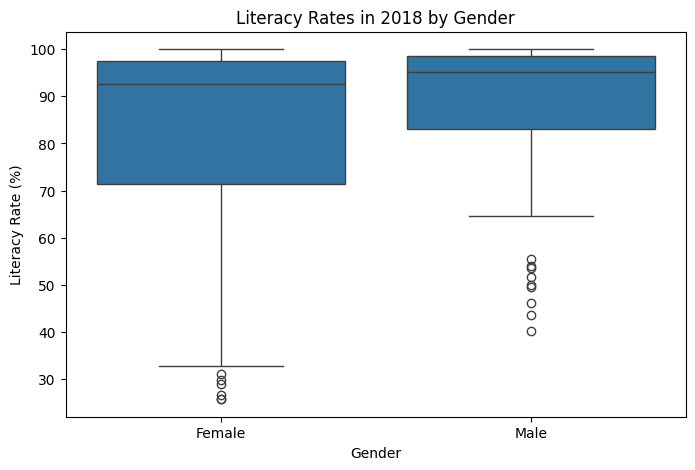

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame
adultfemalelit = df[(df["IndicatorName"] == "Literacy rate, adult female (% of females ages 15 and above)") & (df["Year"] == 2018)]["Value"]
adultmalelit = df[(df["IndicatorName"] == "Literacy rate, adult male (% of males ages 15 and above)") & (df["Year"] == 2018)]["Value"]
# Create a new DataFrame to combine the data
data = {
    'Literacy Rate': pd.concat([adultfemalelit, adultmalelit]),
    'Gender': ['Female'] * len(adultfemalelit) + ['Male'] * len(adultmalelit)
}

combined_df = pd.DataFrame(data)

# Create a boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x='Gender', y='Literacy Rate', data=combined_df)

# Set the title and labels
plt.title("Literacy Rates in 2018 by Gender")
plt.xlabel("Gender")
plt.ylabel("Literacy Rate (%)")

# Show the plot
plt.show()


# **Problem 16 - Come Prepared to Class**

Take 10-20 minutes and explore this dataset. What new interesting insights did you discover? Come to class prepared to explain your insights.

**Q16. Are you prepared to share a new insight about this data in class?**

In [232]:
print(df[df["IndicatorName"] == "Adolescent fertility rate (births per 1,000 women ages 15-19)"].groupby(by="CountryName")["Value"].mean().sort_values(ascending=False).head())
print(df[df["IndicatorName"] == "Access to electricity (% of population)"].groupby(by="CountryName")["Value"].mean().sort_values().head())
print(df[df["IndicatorName"] == "Incidence of malaria (per 1,000 population at risk)"].groupby(by="CountryName")["Value"].mean().sort_values(ascending=False).head())
# No country is in the top 5 of more than 1 of these three

CountryName
Niger                202.77909
Chad                 186.00431
Mali                 179.74246
Angola               172.90159
Equatorial Guinea    168.93710
Name: Value, dtype: float64
CountryName
American Samoa    0.000000
South Sudan       2.244074
Burundi           5.850171
Chad              6.629211
Liberia           7.684775
Name: Value, dtype: float64
CountryName
Burkina Faso                479.691354
Cote d'Ivoire               422.644524
Central African Republic    406.580475
Benin                       404.238811
Sierra Leone                396.333043
Name: Value, dtype: float64
